In [1]:
import ares
import matplotlib.pyplot as plt
import numpy as np
import time

In [24]:
pf = \
    {
    'radiative_transfer':False,
    'verbose':False,
    'dark_matter_heating':True, 
    'include_cgm':False, 
    # 'initial_v_stream':0, 
    'initial_redshift':1010, 
    'include_He':True,
    'dark_matter_mass': 0.1
    }

V_rms = 29000 # m/s

N = 20 # number of initial_v_stream
N_z = 100

# initial_v_stream_list = np.random.normal(0, V_rms, N)
mean = np.zeros(3)
cov = np.eye(3,3) * V_rms**2 /3
initial_v_stream_list = np.random.multivariate_normal(mean, cov, N)
initial_v_stream_list = np.sqrt(np.sum(initial_v_stream_list**2, axis=1))
# print(mean, cov, initial_v_stream_list.shape)
# print(initial_v_stream_list)
# initial_v_stream_list = abs(initial_v_stream_list)
sim_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

z_array = np.linspace(6, 300, N_z)
dTb_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

default = ares.simulations.Global21cm(verbose=False, radiative_transfer=False)
default.run()

In [26]:
start_time = time.time()

for i, initial_v_stream in enumerate(initial_v_stream_list):
    print("initial_v_stream =", initial_v_stream, 'm/s.')
    sim_dict[initial_v_stream] = ares.simulations.Global21cm(initial_v_stream = initial_v_stream, **pf)
    sim = sim_dict[initial_v_stream]
    sim.run()
    
    dTb_dict[initial_v_stream] = np.interp(z_array, sim.history['z'][::-1], sim.history['dTb'][::-1])
    # sim_dict[initial_v_stream].save()

end_time = time.time()
time_elapse = end_time - start_time
print("It costs {} seconds to average {} different initial_v_stream.".format(time_elapse, N))

initial_v_stream = 16870.568979536907 m/s.
initial_v_stream = 18292.37312332394 m/s.
initial_v_stream = 37452.811131443676 m/s.
initial_v_stream = 19701.99003432687 m/s.


/home/bxia34/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


initial_v_stream = 27621.423400695447 m/s.
initial_v_stream = 36752.289984408846 m/s.
initial_v_stream = 22170.106912783667 m/s.
initial_v_stream = 44757.444107480536 m/s.
initial_v_stream = 60828.56194996371 m/s.
initial_v_stream = 26881.654096577404 m/s.
initial_v_stream = 27307.75554152289 m/s.
initial_v_stream = 22563.379552187125 m/s.
initial_v_stream = 19525.065154629694 m/s.
initial_v_stream = 31445.15006386662 m/s.
initial_v_stream = 30968.597467676354 m/s.
initial_v_stream = 32918.34650864804 m/s.
initial_v_stream = 6074.404981362447 m/s.
initial_v_stream = 41813.69602336915 m/s.
initial_v_stream = 26193.771632451706 m/s.
initial_v_stream = 24828.994254446214 m/s.
It costs 85.35416650772095 seconds to average 20 different initial_v_stream.


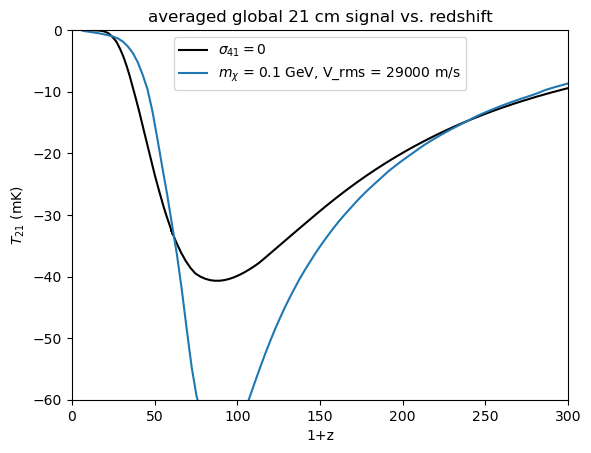

In [27]:
dTb_average = np.average(list(dTb_dict.values()), axis=0)

plt.plot(1+default.history['z'], default.history['dTb'], c='k', linestyle='-', label='$\sigma_{41} = 0$')
plt.plot(1+z_array, dTb_average, label=r'$m_{\chi}$ '+'= {} GeV, V_rms = {} m/s'.format(sim.pf['dark_matter_mass'], V_rms))#, label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))

plt.title("averaged global 21 cm signal vs. redshift")
plt.xlabel("1+z")
plt.ylabel(r"$T_{21}$ (mK)")
plt.xlim(0, 300)
plt.ylim(-60, 0)
plt.legend()
plt.show()

In [28]:
# for initial_v_stream in initial_v_stream_list:
#     sim = sim_dict[initial_v_stream]
#     plt.plot(1+sim.history['z'], sim.history['dTb'], label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
# plt.title("global 21 cm signal vs. redshift")
# plt.xlabel("z")
# plt.ylabel(r"$T_{21}$ (mK)")
# plt.xlim(0, 300)
# plt.ylim(-60, 0)
# plt.legend()
# plt.show()

In [13]:
import ares
import matplotlib.pyplot as plt
import numpy as np
import time
import os

V_rms = 29000 # m/s
N = 5 # number of initial_v_stream

pf = \
    {
    'radiative_transfer':False,
    'verbose':False,
    'dark_matter_heating':True, 
    'include_cgm':False, 
    # 'initial_v_stream':0, 
    'initial_redshift':1010, 
    'include_He':True,
    'dark_matter_mass': 1
    }

# initial_v_stream_list = np.random.normal(0, V_rms, N)
mean = np.zeros(3)
cov = np.eye(3,3) * V_rms**2 /3
initial_v_stream_list = np.random.multivariate_normal(mean, cov, N)
initial_v_stream_list = np.sqrt(np.sum(initial_v_stream_list**2, axis=1))
# print(mean, cov, initial_v_stream_list.shape)
# print(initial_v_stream_list)
# initial_v_stream_list = abs(initial_v_stream_list)
# sim_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

# z_array = np.linspace(6, 300, N_z)
# dTb_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

# default = ares.simulations.Global21cm(verbose=False, radiative_transfer=False)
# default.run()

In [14]:
start_time = time.time()

for i, initial_v_stream in enumerate(initial_v_stream_list):
    print("initial_v_stream =", initial_v_stream, 'm/s.')
    sim = ares.simulations.Global21cm(initial_v_stream = initial_v_stream, **pf)
    # sim = sim_dict[initial_v_stream]
    sim.run()

    if not os.path.exists("./average_dTb/m_chi{}".format(sim.pf['dark_matter_mass'])):
        os.makedirs("./average_dTb/m_chi{}".format(sim.pf['dark_matter_mass']))
    
    np.save("./average_dTb/m_chi{}/{}".format(sim.pf['dark_matter_mass'], (int(initial_v_stream))), np.vstack((sim.history["z"], sim.history["dTb"])))
    # dTb_dict[initial_v_stream] = np.interp(z_array, sim.history['z'][::-1], sim.history['dTb'][::-1])
    # sim_dict[initial_v_stream].save()

end_time = time.time()
time_elapse = end_time - start_time
print("It costs {:.2f} seconds to calculate {} different initial_v_streams.".format(time_elapse, N))

initial_v_stream = 13075.252475782961 m/s.
initial_v_stream = 14583.68006463611 m/s.
initial_v_stream = 5398.30196817362 m/s.
initial_v_stream = 31692.687421771654 m/s.
initial_v_stream = 23854.414245585183 m/s.
It costs 21.36 seconds to calculate 5 different initial_v_streams.
